# Handwritten recognition using Keras CNN 
Original link is [here](https://dida.do/blog/how-to-deploy-a-tensorflow-model-as-a-javascript-web-app)

Made by Tommy

27/1/2021

Cảm ơn đã quan tâm!

# Acquiring data set

In [1]:
import os#
if os.path.exists('/content/tommy')== False:  
  os.mkdir('/content/tommy')
!pip install ipython-autotime
!apt install wget
!apt install ffmpeg
import datetime
now = "Done process at : " + datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(now)
%load_ext autotime
!wget https://www.itl.nist.gov/iaui/vip/cs_links/EMNIST/gzip.zip
!unzip gzip.zip 
!rm gzip.zip
!pip install python-mnist

Reading package lists... Done
Building dependency tree       
Reading state information... Done
wget is already the newest version (1.19.4-1ubuntu2.2).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.
Done process at : 2021-01-28 14:12:07
--2021-01-28 14:12:07--  https://www.itl.nist.gov/iaui/vip/cs_links/EMNIST/gzip.zip
Resolving www.itl.nist.gov (www.itl.nist.gov)... 129.6.13.51, 2610:20:6b01:4::36
Connecting to www.itl.nist.gov (www.itl.nist.gov)|129.6.13.51|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 561753746 (536M) [application/zip]
Saving to: ‘gzip.zip’

gzip.zip            100%[===================>] 535.73M  32.6MB/s    in 17s     

2021-01-28 14:12:25 (31.8 MB/s) - ‘gzip.zip’ saved [561753746/561753746]

Archive:  gzi

DataSource tải từ đây: https://www.nist.gov/node/1298471/emnist-dataset

# Preparing data set

In [2]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, BatchNormalization, Flatten, Dropout, Dense
from mnist import MNIST
import os

time: 1.97 s (started: 2021-01-28 14:12:44 +00:00)


In [3]:
# load the entire EMNIST dataset as numpy arrays (this might take a while)
emnist_data = MNIST(path='gzip', return_type='numpy')
emnist_data.select_emnist('byclass')
x_train, y_train = emnist_data.load_training()
x_test, y_test = emnist_data.load_testing()

time: 1min 57s (started: 2021-01-28 14:12:50 +00:00)


In [4]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((697932, 784), (697932,), (116323, 784), (116323,))

time: 2.79 ms (started: 2021-01-28 14:14:50 +00:00)


In [5]:
img_side = 28

# Reshape tensors to [n, y, x, 1] and normalize the pixel values between [0, 1]
x_train = x_train.reshape(-1, img_side, img_side, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, img_side, img_side, 1).astype('float32') / 255.0

x_train.shape, x_test.shape

((697932, 28, 28, 1), (116323, 28, 28, 1))

time: 1.3 s (started: 2021-01-28 14:14:54 +00:00)


In [6]:
# get number of classes
unique_classes = np.unique(y_train)
num_classes = len(unique_classes)

input_shape = (img_side, img_side, 1)

# weight the classes (to combat the imbalance)
class_weights = dict(enumerate(compute_class_weight('balanced', unique_classes, y_train)))

# Convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

time: 243 ms (started: 2021-01-28 14:14:58 +00:00)


# Create model

In [17]:
kernel_size = (5, 5)
def createmodel():
    return Sequential([
        Convolution2D(16, kernel_size=kernel_size, padding='same', input_shape=input_shape, activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        Dropout(0.4),
        Convolution2D(32, kernel_size=kernel_size, padding='same', activation= 'relu'), #strides=2,
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        Dropout(0.4),
        Convolution2D(64, kernel_size=kernel_size, padding='same', activation= 'relu'),
        MaxPooling2D(pool_size =(2,2)),
        BatchNormalization(),
        Dropout(0.4),
        Flatten(),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.4),
        Dense(num_classes, activation='softmax'),
    ])

time: 7.82 ms (started: 2021-01-28 14:40:50 +00:00)


In [18]:
# setting up model to run on cpu, or gpu when avaiable
model = createmodel()
model.compile(loss="categorical_crossentropy",
        optimizer="adam",
        metrics=["acc"])

time: 94.3 ms (started: 2021-01-28 14:40:53 +00:00)


In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 14, 14, 16)        64        
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        12832     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 7, 7, 32)         

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 14, 14, 16)        64        
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        12832     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 7, 7, 32)         

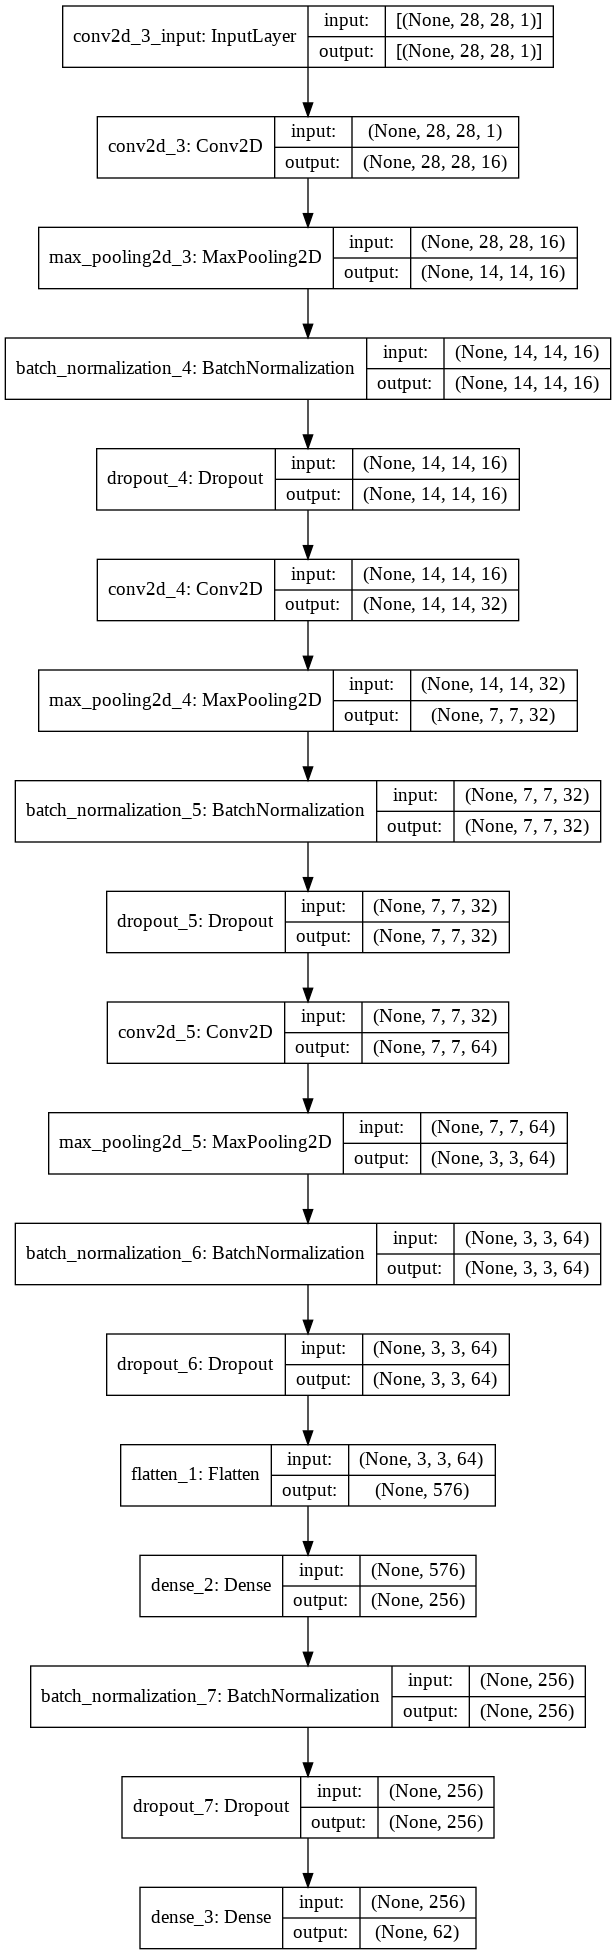

time: 286 ms (started: 2021-01-28 14:41:02 +00:00)


In [20]:
model.summary()
tf.keras.utils.plot_model(model, show_shapes=True)

# Train model

In [21]:
es = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    mode='min',
    verbose=1,
    patience=10,
    restore_best_weights=True)

time: 1.61 ms (started: 2021-01-28 14:41:38 +00:00)


In [37]:
history = model.fit(x_train, y_train,
          #class_weight=class_weights,
          batch_size=10000,
          epochs=200,
          verbose=1,
          shuffle=True,
          validation_data=(x_test, y_test),
          callbacks=[es])

Epoch 1/200
70/70 [==============================] - 9s 133ms/step - loss: 0.4069 - acc: 0.8529 - val_loss: 0.3488 - val_acc: 0.8690
Epoch 2/200
70/70 [==============================] - 9s 132ms/step - loss: 0.4060 - acc: 0.8530 - val_loss: 0.3462 - val_acc: 0.8705
Epoch 3/200
70/70 [==============================] - 9s 132ms/step - loss: 0.4051 - acc: 0.8532 - val_loss: 0.3490 - val_acc: 0.8694
Epoch 4/200
70/70 [==============================] - 9s 132ms/step - loss: 0.4043 - acc: 0.8533 - val_loss: 0.3470 - val_acc: 0.8695
Epoch 5/200
70/70 [==============================] - 9s 132ms/step - loss: 0.4042 - acc: 0.8533 - val_loss: 0.3520 - val_acc: 0.8675
Epoch 6/200
70/70 [==============================] - 9s 132ms/step - loss: 0.4030 - acc: 0.8541 - val_loss: 0.3522 - val_acc: 0.8664
Epoch 7/200
70/70 [==============================] - 9s 132ms/step - loss: 0.4036 - acc: 0.8535 - val_loss: 0.3448 - val_acc: 0.8705
Epoch 8/200
70/70 [==============================] - 9s 132ms/step - 

# Evaluate model

In [38]:
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

3636/3636 [==============================] - 8s 2ms/step - loss: 0.3397 - acc: 0.8718
Test loss: 0.3396607041358948
Test accuracy: 0.8718224167823792
time: 7.85 s (started: 2021-01-28 15:04:12 +00:00)


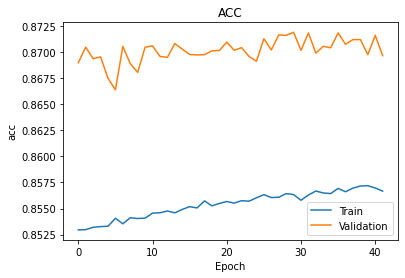

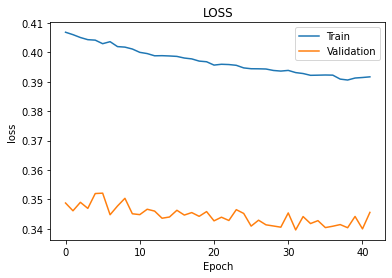

time: 279 ms (started: 2021-01-28 15:04:31 +00:00)


In [40]:
import matplotlib.pyplot as plt

def plotres(x, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric])
    plt.title(metric.upper())
    plt.ylabel(metric)
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])
    plt.show()

plotres(model.history.history, "acc")
plotres(model.history.history, "loss")

In [30]:
y_pred = model.predict(x_test)

time: 3.48 s (started: 2021-01-28 14:54:53 +00:00)


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import string
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

time: 134 ms (started: 2021-01-28 14:54:58 +00:00)


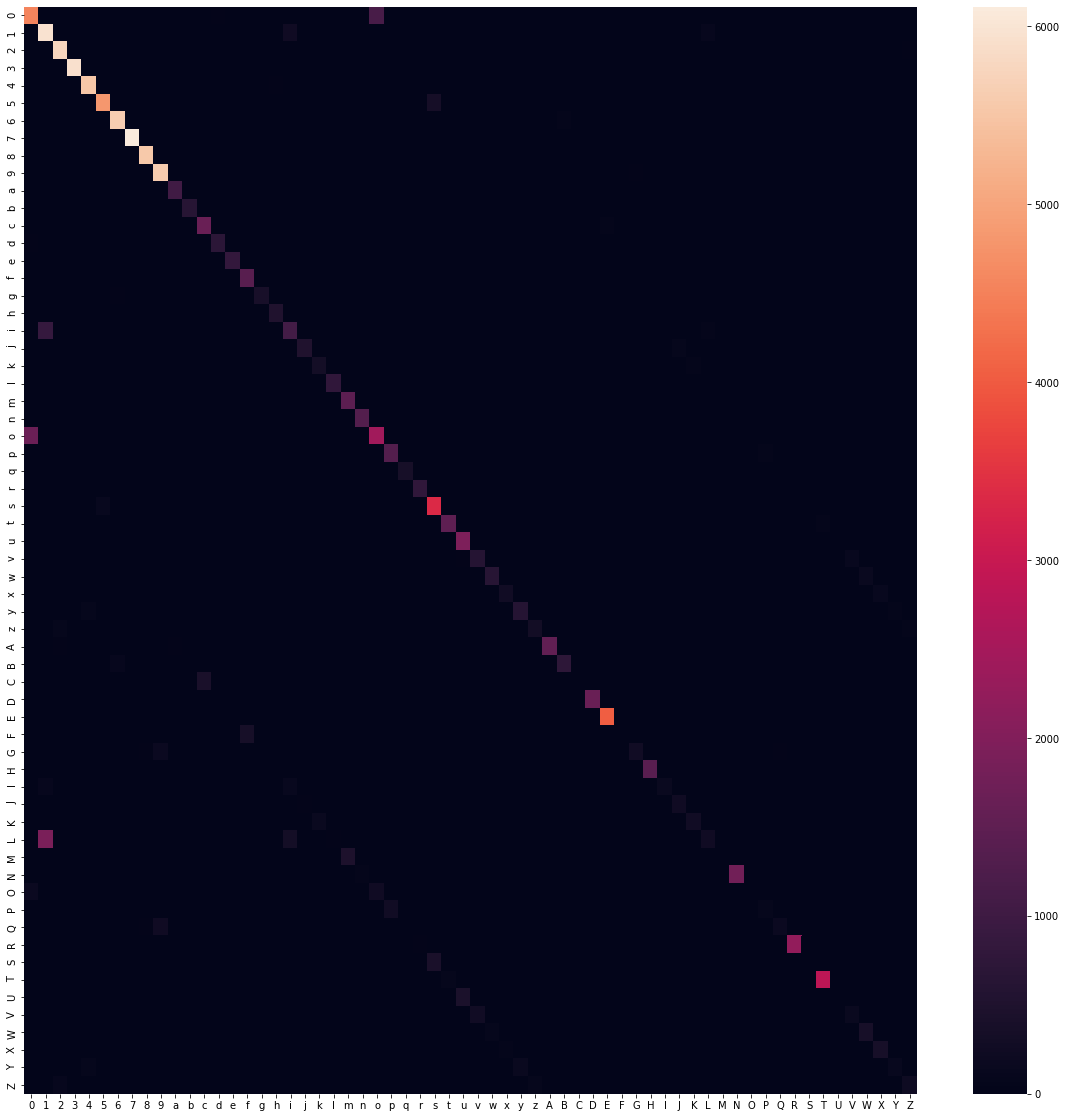

time: 1.32 s (started: 2021-01-28 14:55:01 +00:00)


In [32]:
labels = string.digits+string.ascii_lowercase+string.ascii_uppercase
plt.subplots(figsize=(20,20))
sns.heatmap(confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)), xticklabels=labels, yticklabels=labels)

# Convert model to Javascript

In [33]:
model.save("cnn_emnist.h5")

time: 50.6 ms (started: 2021-01-28 14:55:07 +00:00)


In [34]:
!pip install tensorflowjs

     |████████████████████████████████| 71kB 7.2MB/s 
     |████████████████████████████████| 112kB 20.2MB/s 
  Found existing installation: tensorflow-hub 0.11.0
    Uninstalling tensorflow-hub-0.11.0:
      Successfully uninstalled tensorflow-hub-0.11.0
time: 2.7 s (started: 2021-01-28 14:55:10 +00:00)


In [ ]:
!rm -rf jsmodel/
!tensorflowjs_converter --input_format keras "cnn_emnist.h5" ./jsmodel
!zip -r jsmodel.zip jsmodel/

The JavaScript ready model is now available for download in the files panel (jsmodel.zip)

In [35]:
!tensorflowjs_converter --input_format keras "cnn_emnist.h5" ./jsmodel

2021-01-28 14:55:20.809603: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
time: 2.3 s (started: 2021-01-28 14:55:20 +00:00)


In [36]:
!zip -r jsmodel.zip jsmodel/

  adding: jsmodel/ (stored 0%)
  adding: jsmodel/model.json (deflated 87%)
  adding: jsmodel/group1-shard1of1.bin (deflated 7%)
time: 189 ms (started: 2021-01-28 14:55:47 +00:00)
